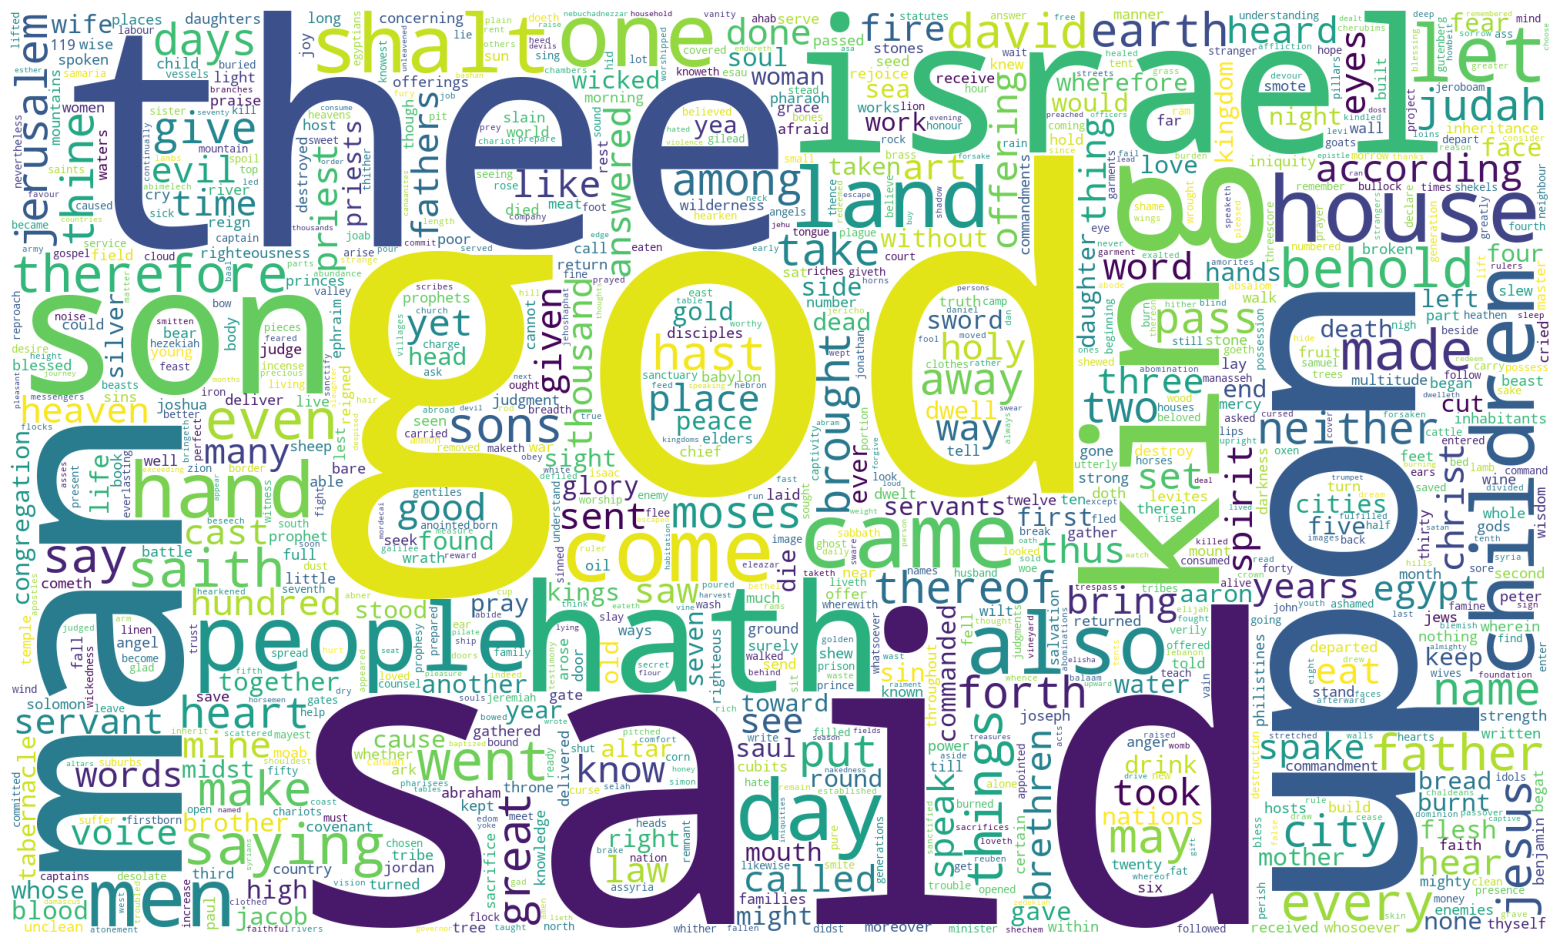

In [9]:
with open("gutenber_bible.txt", encoding="utf-8") as f:
    raw_text = f.read()

with open("NLTK's list of english stopwords.txt", encoding='utf-8') as f:
    stopwords = [word for line in f for word in line.split()]

import re
words = re.sub("[^a-z0-9]+", " ", raw_text.lower()).split(" ")

filtered_words = [w for w in words if not w in stopwords and len(w) >= 3]

# from stemming.porter2 import stem
# filtered_words = [stem(word) for word in filtered_words]

pairs = [(w,1) for w in filtered_words]
from itertools import groupby
pairs.sort()
word = lambda pair: pair[0]
grouped_pairs = [(w, sum(1 for _ in g)) for w,g in groupby(pairs, key=word)]

occurences = lambda pair: pair[1]
grouped_pairs.sort(key=occurences, reverse=True)

# import csv
# with open('counts.csv', 'w', newline='') as csv_file:
#     writer = csv.writer(csv_file, delimiter=';')
#     writer.writerows([(p[1],p[0]) for p in grouped_pairs[5:]])

import matplotlib.pyplot as plt
import pandas as pd
from wordcloud import WordCloud

frequencies = {}
for w,g in grouped_pairs[5:]:
    frequencies[w] = g

word_cloud = WordCloud(width=2000, height=1200,
                       background_color='white',
                       max_words=1000,
                       min_font_size=10).generate_from_frequencies(frequencies)
plt.figure(figsize=(20,12))
plt.imshow(word_cloud)
plt.axis('off')
plt.show()